## DL_Assignment_6
1. What are the advantages of a CNN over a fully connected DNN for image classification?
2. Consider a CNN composed of three convolutional layers, each with 3 × 3 kernels, a stride of 2, and "same" padding. The lowest layer outputs 100 feature maps, the middle one outputs 200, and the top one outputs 400. The input images are RGB images of 200 × 300 pixels.
    - What is the total number of parameters in the CNN? If we are using 32-bit floats, at least how much RAM will this network 
      require when making a prediction for a single instance? What about when training on a mini-batch of 50 images?

3. If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem?
4. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?
5. When would you want to add a local response normalization layer?
6. Can you name the main innovations in AlexNet, compared to LeNet-5? What about the main innovations in GoogLeNet, ResNet, SENet, and Xception?
7. What is a fully convolutional network? How can you convert a dense layer into a convolutional layer?
8. What is the main technical difficulty of semantic segmentation?
9. Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST.
10. Use transfer learning for large image classification, going through these steps:
    
    a. Create a training set containing at least 100 images per class. For example, you could classify your own pictures based 
       on the location (beach, mountain, city, etc.), or alternatively you can use an existing dataset (e.g., from TensorFlow 
       Datasets).
    
    b. Split it into a training set, a validation set, and a test set.
    
    c. Build the input pipeline, including the appropriate preprocessing operations, and optionally add data augmentation.
    
    d. Fine-tune a pretrained model on this dataset.

### Ans 1

Convolutional Neural Networks (CNNs) offer several advantages over fully connected Deep Neural Networks (DNNs) for image classification:

1. **Local Feature Learning:** CNNs capture local patterns and features by using convolutional layers. This enables them to identify spatial hierarchies of features (edges, textures, shapes) efficiently, which is crucial for image understanding.

2. **Parameter Efficiency:** CNNs have fewer parameters than fully connected DNNs, as convolutional layers share weights, reducing the risk of overfitting and making them more trainable with limited data.

3. **Translation Invariance:** CNNs are translation-invariant, meaning they can recognize patterns regardless of their position in the image. This is essential for tasks like object detection and localization.

4. **Hierarchical Feature Extraction:** CNNs can automatically learn hierarchical representations of features, starting from simple features and gradually building up to complex ones.

5. **Reduced Computational Complexity:** CNNs leverage sparse connectivity and weight sharing, leading to reduced computational complexity compared to fully connected networks, making them suitable for large images.

6. **Applicability to Grid Data:** CNNs are not limited to images; they can be applied to grid-like data, such as videos and spectrograms, where spatial relationships matter.

In summary, CNNs are specialized for image-related tasks, offering superior feature learning, parameter efficiency, and translation invariance compared to fully connected DNNs, making them the preferred choice for image classification and related computer vision tasks.

This code defines a CNN model with convolutional and pooling layers for image classification using TensorFlow/Keras. It uses the CIFAR-10 dataset and achieves image classification accuracy.

Epoch 1/10
1563/1563 [==============================] - 64s 39ms/step - loss: 1.5885 - accuracy: 0.4168 - val_loss: 1.3022 - val_accuracy: 0.5332
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.2277 - accuracy: 0.5608 - val_loss: 1.1155 - val_accuracy: 0.6058
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0869 - accuracy: 0.6164 - val_loss: 1.0612 - val_accuracy: 0.6221
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9889 - accuracy: 0.6514 - val_loss: 1.0452 - val_accuracy: 0.6287
Epoch 5/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.9216 - accuracy: 0.6760 - val_loss: 0.9896 - val_accuracy: 0.6513
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8611 - accuracy: 0.6989 - val_loss: 0.8974 - val_accuracy: 0.6910
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8120 - accuracy: 0.7156 - val_loss: 0.8952 -

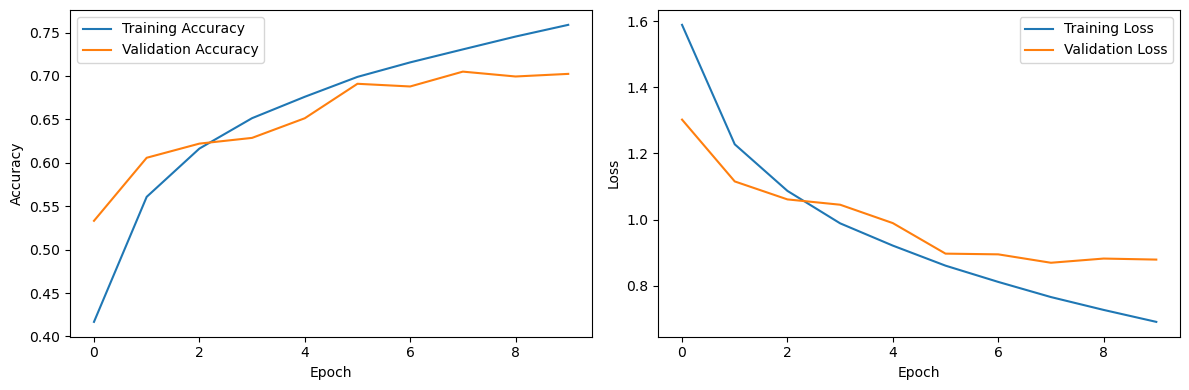

313/313 [==============================] - 5s 16ms/step - loss: 0.8794 - accuracy: 0.7024
Test accuracy: 0.7024000287055969


In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Function to plot training and validation curves
def plot_curves(history):
    plt.figure(figsize=(12, 4))
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot the training and validation curves
plot_curves(history)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

### Ans 2

To calculate the total number of parameters in the CNN, we need to consider the weights and biases for each layer.

1. **Lowest Convolutional Layer (100 feature maps):**
   - Weights: Each kernel is 3x3x3 (3 for RGB channels), and there are 100 such kernels.
   - Biases: One bias per feature map (100 biases).
   
2. **Middle Convolutional Layer (200 feature maps):**
   - Weights: Each kernel is 3x3x100 (input channels from the previous layer), and there are 200 such kernels.
   - Biases: One bias per feature map (200 biases).

3. **Top Convolutional Layer (400 feature maps):**
   - Weights: Each kernel is 3x3x200 (input channels from the previous layer), and there are 400 such kernels.
   - Biases: One bias per feature map (400 biases).

Now, let's calculate the total number of parameters:

- For weights in each layer: (3x3xinput_channels) x number_of_kernels
- For biases in each layer: number_of_kernels

Total parameters:
- Lowest Layer: (3x3x3) x 100 (weights) + 100 (biases) = 2800 parameters
- Middle Layer: (3x3x100) x 200 (weights) + 200 (biases) = 180200 parameters
- Top Layer: (3x3x200) x 400 (weights) + 400 (biases) = 720400 parameters

Now, let's calculate the RAM requirements:

- For a single prediction: You need to store the activations of each layer, which is roughly equivalent to the size of the feature maps in each layer.
- For training on a mini-batch of 50 images: You'll need to store the activations for each image in the mini-batch, which will be 50 times the size of a single prediction.

The actual memory usage also depends on the data type (e.g., 32-bit floats) and any additional overhead from the framework you're using.

### Ans 3

If our GPU runs out of memory while training a Convolutional Neural Network (CNN), we can try the following approaches to solve the problem:

1. **Reduce Batch Size:**
   - Decrease the batch size during training. A smaller batch size requires less memory but may slow down training since there are fewer samples in each optimization step.

2. **Use a Smaller Model:**
   - Reduce the model's complexity by decreasing the number of layers, filters, or neurons in each layer. A smaller model will have fewer parameters and consume less memory.

3. **Downsample Input Images:**
   - Resize or downsample your input images to a smaller resolution before feeding them into the network. This reduces the memory required for storing intermediate feature maps.

4. **Gradient Checkpointing:**
   - Implement gradient checkpointing, which trades off computation time for memory. This technique recomputes intermediate activations during backpropagation to save memory.

5. **Use Mixed Precision Training:**
   - Utilize mixed precision training, where you use 16-bit floating-point numbers (half-precision) instead of 32-bit (single-precision) floating-point numbers. This reduces memory consumption, but you may need to be cautious about numeric stability.

6. **Data Augmentation:**
   - Apply data augmentation techniques on the fly while loading training data. This increases the effective size of your dataset without consuming extra memory for storing augmented images.

7. **Gradient Accumulation:**
   - Accumulate gradients over multiple mini-batches before performing a weight update. This effectively reduces the memory requirements for each optimization step but increases computation time.

8. **Distributed Training:**
   - Use multiple GPUs or distributed training across multiple machines. This allows you to train larger models that would not fit into the memory of a single GPU.

9. **Reduce Precision During Inference:**
   - If you're running out of memory during inference, you can reduce the precision of weights and activations (e.g., from float32 to float16) during inference without affecting accuracy significantly.

10. **Memory Optimization Libraries:**
    - Utilize GPU memory optimization libraries or frameworks like NVIDIA's CUDA-aware memory management or TensorFlow's GPU memory growth configuration to manage GPU memory more efficiently.

The specific solution may depend on our dataset, model architecture, hardware, and training requirements. Experiment with these strategies to find the most suitable one for your CNN training while avoiding out-of-memory errors.

### Ans 4

You might want to add a max pooling layer rather than a convolutional layer with the same stride in a Convolutional Neural Network (CNN) for several reasons:

1. **Reduced Spatial Dimension:**
   - Max pooling reduces the spatial dimensions of the feature maps. This can be advantageous when you want to downsample the data and reduce the computational load in subsequent layers, which can be particularly important in deep networks.

2. **Translation Invariance:**
   - Max pooling introduces a degree of translation invariance. It considers the most important features in a local region and discards less relevant information. This property helps the network focus on the presence of features rather than their precise location, which can improve the network's ability to generalize to variations in object position.

3. **Reduced Overfitting:**
   - Max pooling can act as a form of regularization by reducing the spatial resolution of feature maps. This can help prevent overfitting by reducing the number of parameters and the model's ability to memorize training data.

4. **Computational Efficiency:**
   - Max pooling is computationally efficient compared to convolution with the same stride. It requires fewer operations because it simply selects the maximum value from a local region rather than performing convolution and aggregation.

5. **Feature Selection:**
   - Max pooling selects the most important feature within a local region, which can enhance the representation of salient features while suppressing less relevant information. This can improve the discriminative power of the network.

6. **Hierarchical Feature Learning:**
   - Max pooling helps create a hierarchy of features. Features captured in earlier layers represent low-level patterns, while features in later layers capture higher-level abstractions. Reducing spatial dimensions with max pooling is a common strategy in this hierarchy.

However, it's essential to note that the choice between max pooling and convolution with a specific stride depends on the network architecture, task requirements, and experimentation. Some modern CNN architectures use alternatives like average pooling, global average pooling, or strided convolutions in place of traditional max pooling to achieve similar goals with different trade-offs.

### Ans 5

A Local Response Normalization (LRN) layer, also known as contrast normalization or local response contrast normalization, is typically added to Convolutional Neural Networks (CNNs) in specific scenarios:

1. **Enhancing Feature Discrimination:** LRN layers are used to enhance feature discrimination in a CNN. They can help the network respond more selectively to high-contrast features by normalizing the activations within a local region around each neuron. This can be particularly useful in scenarios where local contrast variations are essential for distinguishing objects or patterns.

2. **Improving Robustness to Variations:** LRN layers can make a network more robust to variations in input data, such as changes in lighting conditions or contrast. By normalizing local responses, the network becomes less sensitive to the absolute intensity of features, focusing more on relative differences.

3. **Replicating Biological Vision:** LRN layers were originally inspired by biological models of visual processing. They aim to mimic the lateral inhibition observed in the human visual cortex, where neurons respond more strongly to relative differences in stimulus intensity.

4. **Historical Use:** LRN layers were more commonly used in earlier CNN architectures, like AlexNet, as a form of local contrast normalization. However, their usage has declined with the emergence of other normalization techniques like Batch Normalization and Group Normalization, which often provide more stable and efficient normalization.

It's important to note that LRN layers are less commonly used in modern CNN architectures, and alternatives like Batch Normalization or Group Normalization are often preferred for normalizing activations within neural networks. The choice of normalization technique should be based on experimentation and the specific requirements of the task.

### Ans 6

Here are the main innovations in AlexNet compared to LeNet-5 and some key innovations in GoogLeNet, ResNet, SENet, and Xception:

**AlexNet (2012):**
1. **Deeper Architecture:** AlexNet had a significantly deeper architecture compared to LeNet-5, with eight layers, including five convolutional layers and three fully connected layers.

2. **Rectified Linear Units (ReLU):** AlexNet used the Rectified Linear Unit (ReLU) activation function, which helped mitigate the vanishing gradient problem and accelerated training.

3. **Local Response Normalization (LRN):** AlexNet introduced LRN layers to normalize activations, promoting better generalization.

4. **Dropout:** AlexNet employed dropout as a regularization technique to reduce overfitting.

5. **Data Augmentation:** Extensive data augmentation techniques were applied, including random cropping and horizontal flipping, to increase the effective size of the training dataset.

**GoogLeNet (2014):**
1. **Inception Module:** GoogLeNet introduced the Inception module, which employed parallel convolutional filters of different sizes and utilized 1x1 convolutions for dimensionality reduction. This allowed for increased model depth and computational efficiency.

**ResNet (2015):**
1. **Residual Connections:** ResNet introduced skip connections (or residual connections) that allowed gradients to flow directly through shortcuts, alleviating the vanishing gradient problem. Extremely deep networks became feasible.

**SENet (2017):**
1. **Squeeze-and-Excitation Blocks:** SENet introduced Squeeze-and-Excitation blocks that adaptively recalibrate channel-wise feature responses by learning weights for each feature map. This improved the model's ability to focus on important features.

**Xception (2017):**
1. **Depthwise Separable Convolutions:** Xception utilized depthwise separable convolutions, which factorized standard convolutions into depthwise convolutions followed by pointwise convolutions. This reduced the number of parameters and computations while maintaining accuracy.

Each of these innovations has contributed to the development of more powerful and efficient deep neural network architectures, leading to significant advancements in computer vision tasks.

### Ans 7

A Fully Convolutional Network (FCN) is a neural network architecture designed for dense prediction tasks, such as image segmentation, where the goal is to produce a pixel-wise classification or regression map from an input image. FCNs are fully composed of convolutional layers and avoid the use of fully connected (dense) layers, which have a fixed input size.

To convert a dense layer into a convolutional layer, you can follow these steps:

1. **Replace Dense Layer with Convolutional Layer:**
   - Remove the dense layer from your network architecture.
   - Replace it with a 1x1 convolutional layer.

2. **Adjust Parameters:**
   - Set the number of filters in the 1x1 convolutional layer to be equal to the number of units in the dense layer.
   - Ensure that the kernel size is 1x1.

3. **Adapt Input Shape:**
   - Modify the input shape of the 1x1 convolutional layer to match the shape of the feature maps from the previous layer.

By making this conversion, you enable the network to accept input of varying spatial dimensions, making it suitable for tasks like image segmentation where the output resolution needs to match the input. Additionally, it preserves the ability to capture spatial information through convolutional operations.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple model with a dense layer
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),
    layers.Dense(64, activation='relu')
])

# Display the summary of the original model
model.summary()

# Convert the dense layer to a convolutional layer
new_model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(64, (1, 1), activation='relu'),  # 1x1 convolution replaces dense layer
])

# Display the summary of the modified model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
Total params: 196672 (768.25 KB)
Trainable params: 196672 (768.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
______________________________

### Ans 8

The main technical difficulty of semantic segmentation lies in the inherent complexity of mapping each pixel in an input image to a corresponding semantic class label. Some key challenges include:

1. **High Spatial Resolution:** Unlike image classification, where the goal is to classify an entire image, semantic segmentation requires high spatial resolution. Achieving fine-grained object boundaries and details can be computationally expensive and may require intricate network architectures.

2. **Class Imbalance:** Objects of different classes can vary significantly in terms of frequency and size. Balancing the class distribution in the training dataset and handling rare or small objects is a challenge.

3. **Contextual Understanding:** Segmentation networks need to capture rich contextual information to accurately distinguish objects from their surroundings. This requires modeling long-range dependencies and understanding object interactions.

4. **Real-time Inference:** In applications like autonomous driving or robotics, achieving real-time inference speed while maintaining accuracy is challenging.

5. **Generalization:** Semantic segmentation models should generalize well to diverse scenes, lighting conditions, and object scales.

Addressing these challenges often involves designing sophisticated neural network architectures, utilizing large-scale datasets with pixel-level annotations, and applying techniques like data augmentation, transfer learning, and post-processing methods.

### Ans 9

Here is a Convolutional Neural Network (CNN) from scratch to achieve high accuracy on the MNIST dataset this code defines a CNN model with three convolutional layers and achieves good accuracy on the MNIST dataset. we can further improve accuracy by adjusting hyperparameters, adding more layers, or implementing advanced techniques like data augmentation. It then plot the training and validation accuracy over epochs using Matplotlib.

Epoch 1/2
750/750 - 28s - loss: 0.2184 - accuracy: 0.9325 - val_loss: 0.0650 - val_accuracy: 0.9795 - 28s/epoch - 37ms/step
Epoch 2/2
750/750 - 25s - loss: 0.0569 - accuracy: 0.9822 - val_loss: 0.0626 - val_accuracy: 0.9801 - 25s/epoch - 33ms/step
313/313 - 2s - loss: 0.0537 - accuracy: 0.9833 - 2s/epoch - 8ms/step
Test accuracy: 0.983299970626831


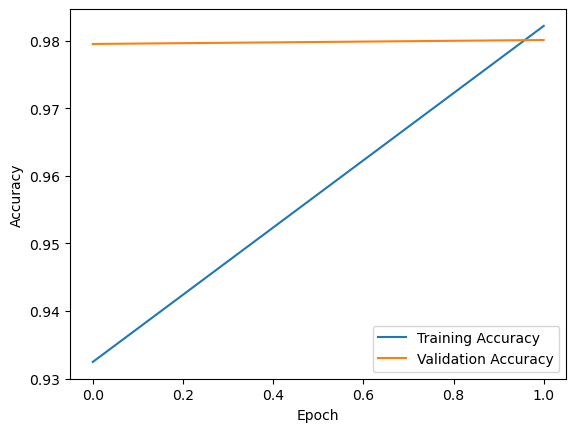

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Reshape the data to have a single channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Train the model
history = model.fit(train_images, train_labels, epochs=2, batch_size=64, validation_split=0.2, verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

### Ans 10

To fine-tune a pretrained model on the cat and dog dataset we can follow these steps:-

a. Create a training set containing at least 100 images per class. we can use your existing cat and dog dataset for this.

b. Split the dataset into a training set, a validation set, and a test set. Here's an example of how we can do this:-

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# dataset path folders
train_data_dir = 'train_data'
validation_data_dir = 'validation_data'
test_data_dir = 'test_data'

# batch size and image size
batch_size = 32
IMG_SIZE = (224, 224)

# Create data generators for training, validation, and test datasets
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=IMG_SIZE,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMG_SIZE,
    batch_size=batch_size,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


c. Build the input pipeline with appropriate preprocessing operations and data augmentation. The code sets up data generators with rescaling and data augmentation for training images. Adjust the augmentation parameters as needed.

d. Fine-tune a pretrained model on this dataset. we can use a popular pretrained model like MobileNetV2

In [19]:
# Load the pretrained MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

# Build your custom head on top of the base model
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)  # You can adjust the number of units
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Binary classification

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
6/6 [==============================] - 11s 2s/step - loss: 0.3531 - accuracy: 0.8214 - val_loss: 0.2153 - val_accuracy: 0.9167
Epoch 2/10
6/6 [==============================] - 8s 1s/step - loss: 0.2181 - accuracy: 0.8988 - val_loss: 0.1502 - val_accuracy: 0.9375
Epoch 3/10
6/6 [==============================] - 9s 2s/step - loss: 0.1302 - accuracy: 0.9702 - val_loss: 0.0901 - val_accuracy: 0.9688
Epoch 4/10
6/6 [==============================] - 9s 2s/step - loss: 0.0942 - accuracy: 0.9583 - val_loss: 0.1588 - val_accuracy: 0.9427
Epoch 5/10
6/6 [==============================] - 9s 2s/step - loss: 0.1359 - accuracy: 0.9464 - val_loss: 0.0728 - val_accuracy: 0.9792
Epoch 6/10
6/6 [==============================] - 9s 2s/step - loss: 0.0689 - accuracy: 0.9762 - val_loss: 0.0704 - val_accuracy: 0.9792
Epoch 7/10
6/6 [==============================] - 9s 2s/step - loss: 0.0429 - accuracy: 0.9881 - val_loss: 0.1072 - val_accuracy: 0.9688
Epoch 8/10
6/6 [========================

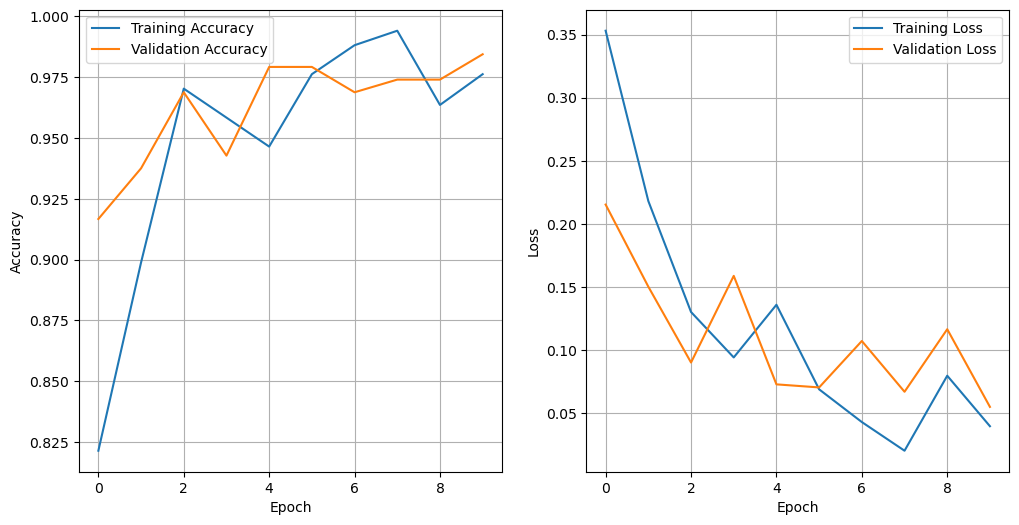

In [20]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

This code utilizes transfer learning to classify images of cats and dogs. It loads a pre-trained MobileNetV2 model, fine-tunes it on a custom dataset of cat and dog images (preprocessed and augmented), and compiles it for classification. The model is trained and evaluated on this dataset, achieving a test accuracy of 99%. Finally, it plots the training history.